In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('housing.csv')

In [6]:
print(data.info())
print(data.describe())
print(" ")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [7]:
X = data.drop('median_house_value', axis=1)
# Use one-hot encoding on the categorical column
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)
# Fill missing values in X with the mean of each column
# X = X.fillna(X.mean())

# X = X.fillna(X.median())

# This does best of the three as rmse is least 
X = X.dropna()

"""
"""
y = data['median_house_value']
y = y[X.index]  # Ensure y aligns with X after dropping rows

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,True,False,False,False


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
train_data = X_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,False,False,False,False,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,True,False,False,False,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,True,False,False,False,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,False,False,False,False,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,False,False,False,True,214600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,False,False,False,False,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,False,False,False,False,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,False,False,False,False,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,False,False,True,False,231200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

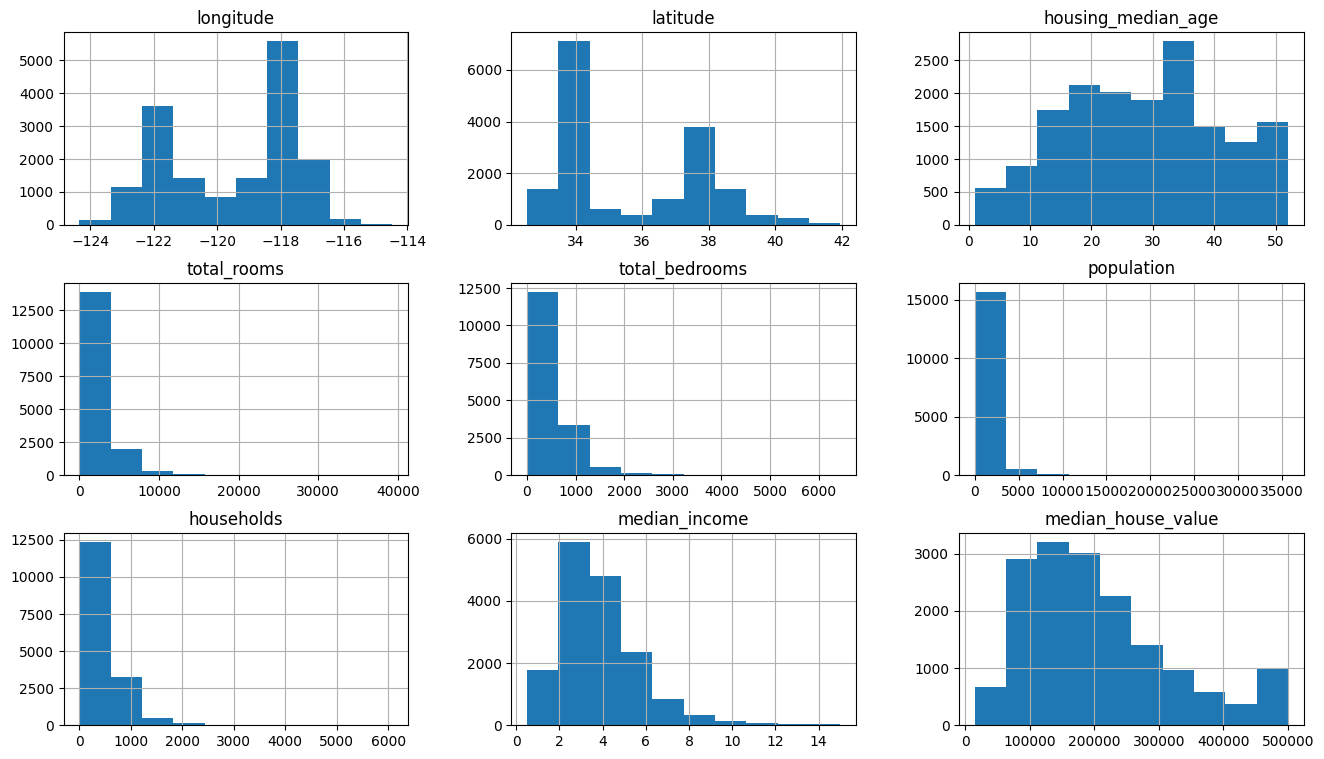

In [12]:
train_data.hist(figsize=(16, 9))

In [13]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.050463,0.008492,-0.475731,0.046118,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,0.347245,-0.014571,0.360561,-0.161338,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,-0.235569,0.016215,0.255591,0.019654,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.024758,-0.005975,-0.019720,-0.008668,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,-0.009414,-0.002512,-0.019040,0.001575,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.022369,-0.008305,-0.058497,-0.023004,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,-0.041926,-0.006820,-0.009957,0.002544,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,-0.234058,-0.009245,0.063391,0.022947,0.688695
ocean_proximity_INLAND,-0.050463,0.347245,-0.235569,0.024758,-0.009414,-0.022369,-0.041926,-0.234058,1.000000,-0.009197,-0.241904,-0.261614,-0.482445
ocean_proximity_ISLAND,0.008492,-0.014571,0.016215,-0.005975,-0.002512,-0.008305,-0.006820,-0.009245,-0.009197,1.000000,-0.004828,-0.005222,0.027272


<Axes: >

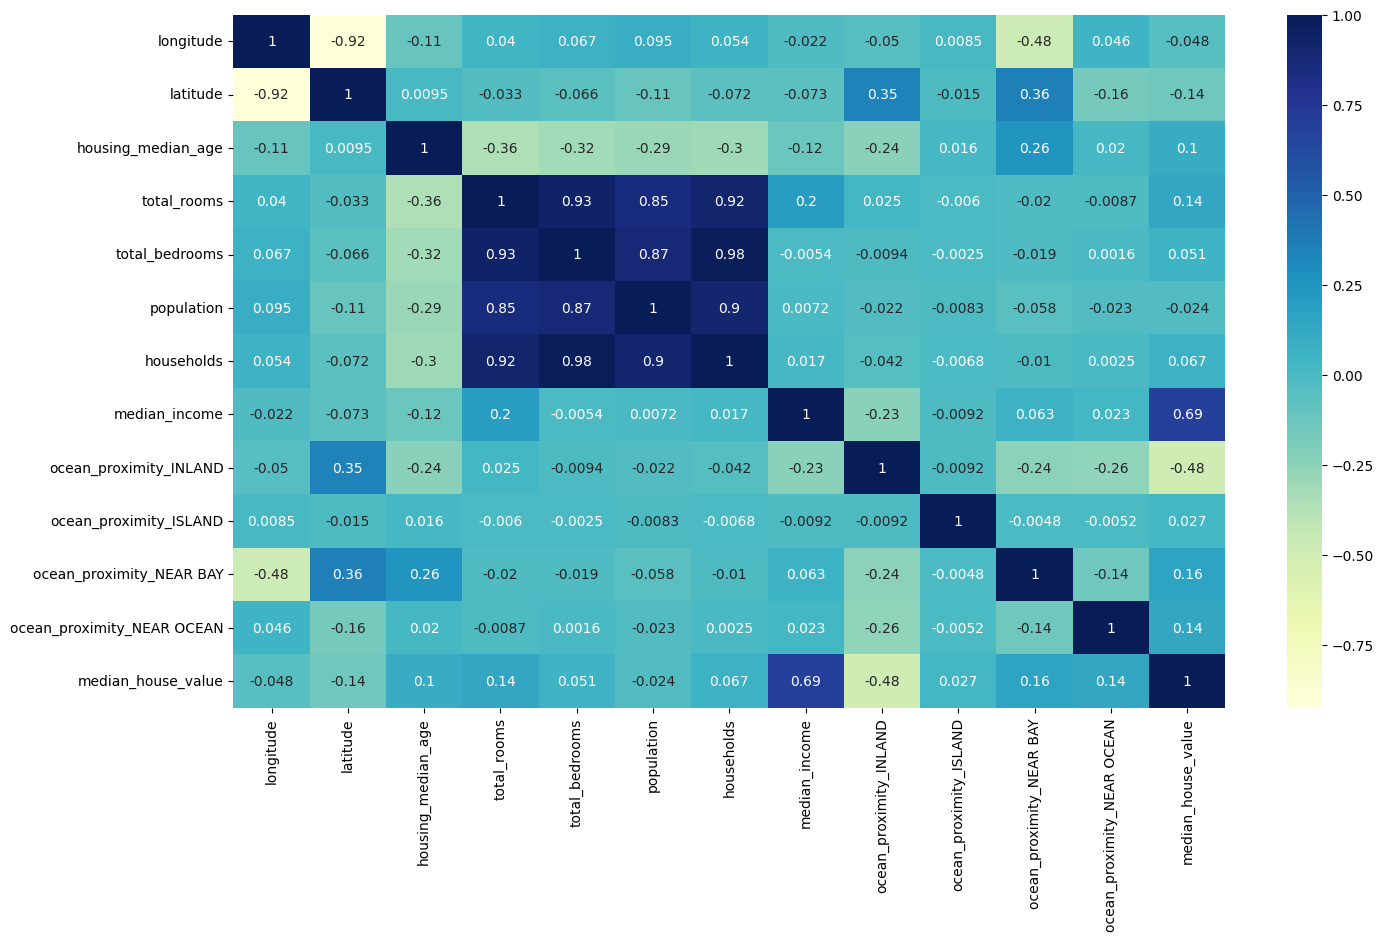

In [14]:
plt.figure(figsize=(16, 9))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [15]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

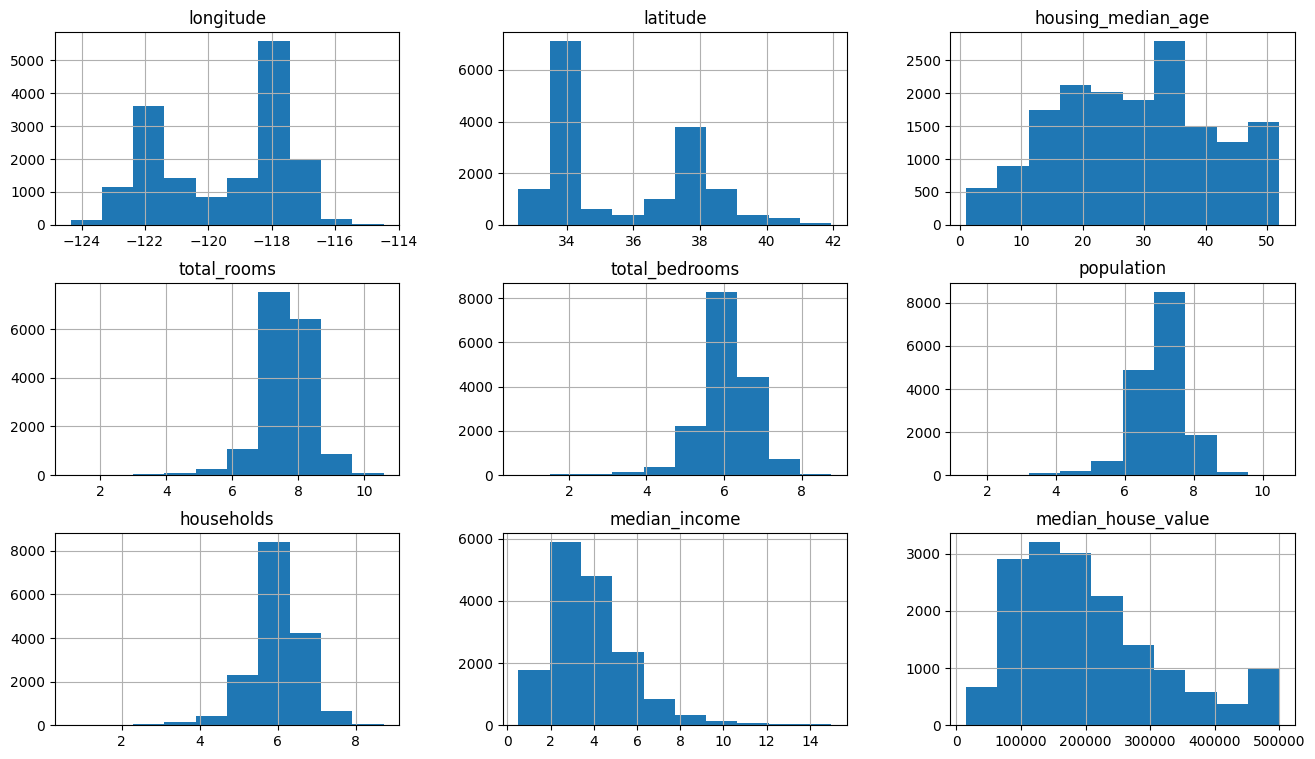

In [16]:
train_data.hist(figsize=(16, 9))

<Axes: xlabel='longitude', ylabel='latitude'>

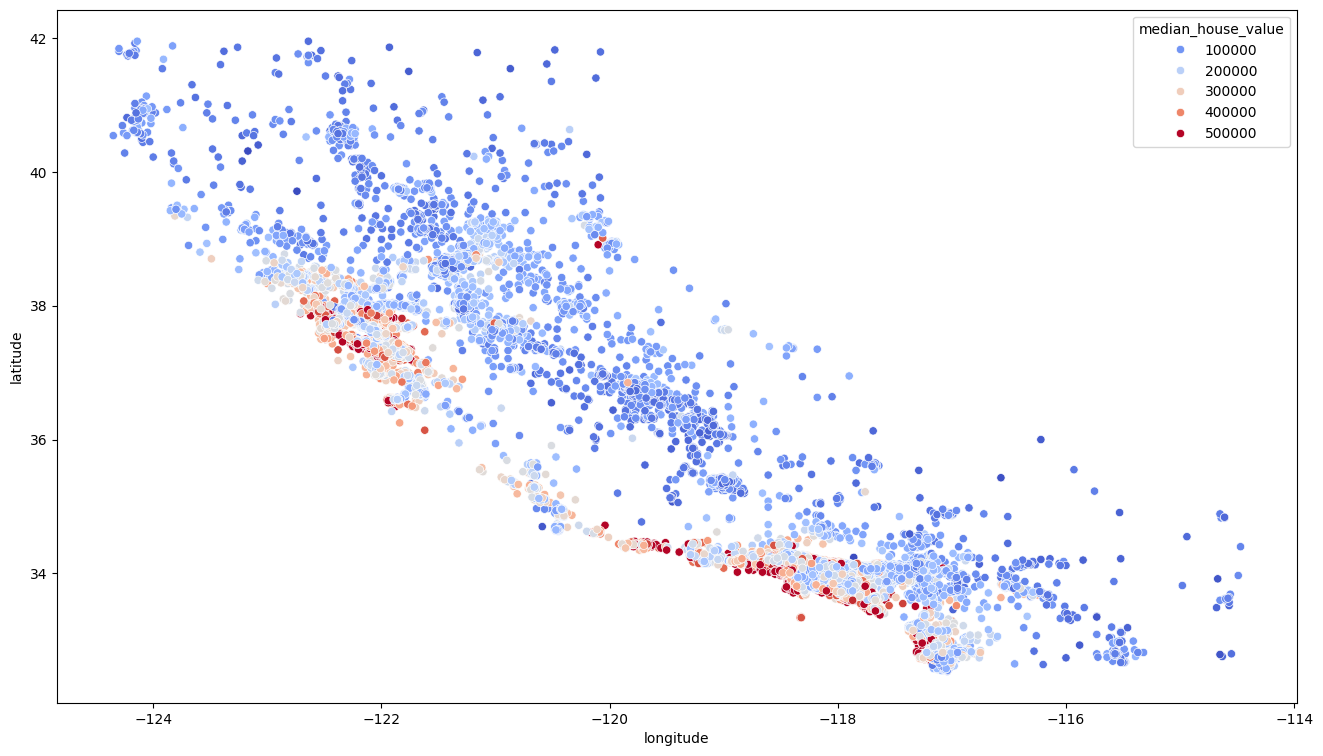

In [17]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x='longitude', y='latitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

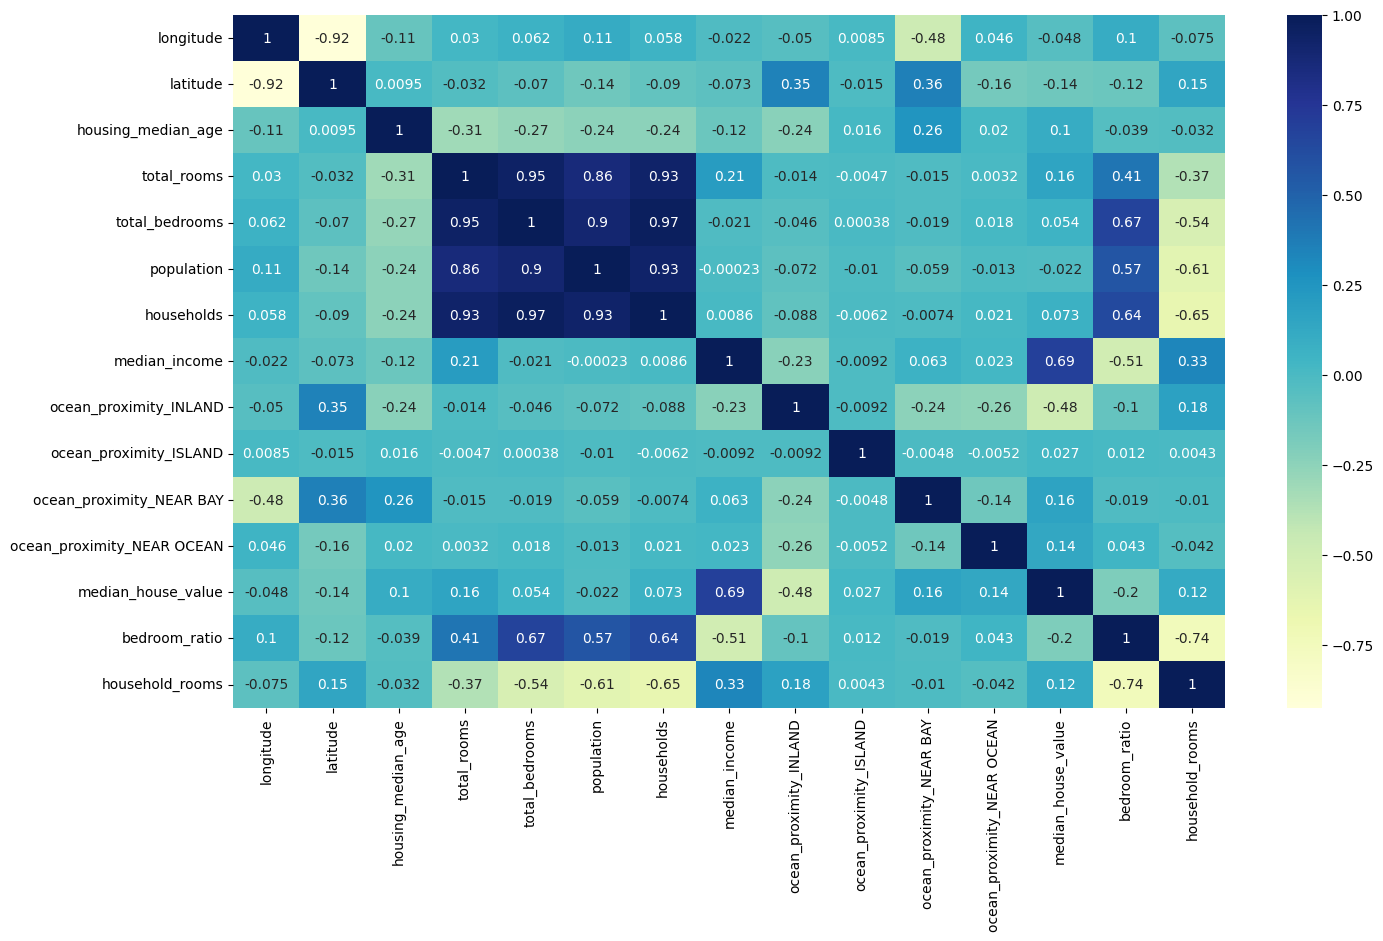

In [19]:
plt.figure(figsize=(16, 9))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [20]:
X_train_new, y_train_new = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']


# Imported standar scaler above
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_new)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# New model with more engineered features
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)

LinearRegression()

In [23]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [24]:
X_test_new, y_test_new = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

X_test_s = scaler.transform(X_test_new)

In [25]:
y_pred_new = model_new.predict(X_test_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

In [26]:
print(f"Mean Squared Error: {mse_new}")
rmse_new = mse_new ** 0.5
print(f"Root Mean Squared Error: {rmse_new}")
print(f"R-squared: {r2_new}")

Mean Squared Error: 4530030653.760363
Root Mean Squared Error: 67305.50240329807
R-squared: 0.6687407117584974


In [27]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train)

LinearRegression()

In [28]:
y_pred_s = model_s.predict(X_test_s)
mse_s = mean_squared_error(y_test, y_pred_s)
r2_s = r2_score(y_test, y_pred_s)

In [29]:
print(f"Mean Squared Error: {mse_s}")
rmse_s = mse_s ** 0.5
print(f"Root Mean Squared Error: {rmse_s}")
print(f"R-squared: {r2_s}")

Mean Squared Error: 4530030653.760369
Root Mean Squared Error: 67305.50240329812
R-squared: 0.6687407117584969


In [30]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean Squared Error: {mse}")
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4802173538.604191
Root Mean Squared Error: 69297.71669113052
R-squared: 0.648840215443197


In [32]:
# Using Random Forest Algorithm from below
from sklearn.ensemble import RandomForestRegressor

In [33]:
forest = RandomForestRegressor()

forest.fit(X_train_new, y_train)

RandomForestRegressor()

In [34]:
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [35]:
forest.score(X_test_new, y_test_new)

c:\Users\vedes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-2.2260402502911765

In [36]:
forest.score(X_test_s, y_test_new)

0.8209918631146129

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [8, 12, 20],
    "min_samples_split": [2, 4, 6, 8]
}

forest_new = RandomForestRegressor()

grid_search = GridSearchCV(forest_new, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(X_train_s, y_train_new)

KeyboardInterrupt: 

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test_new)

0.8175504549799737

In [ ]:
# Visualization
import matplotlib.pyplot as plt

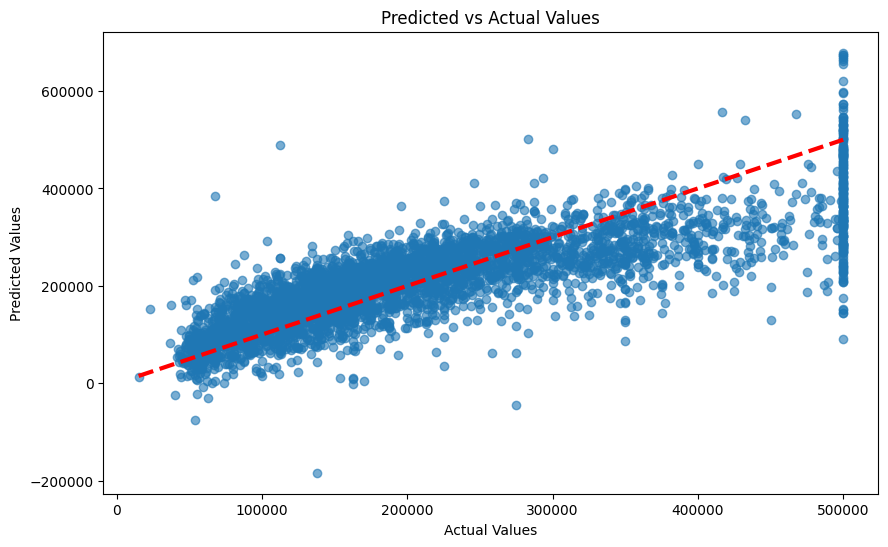

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)

# Ideal Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

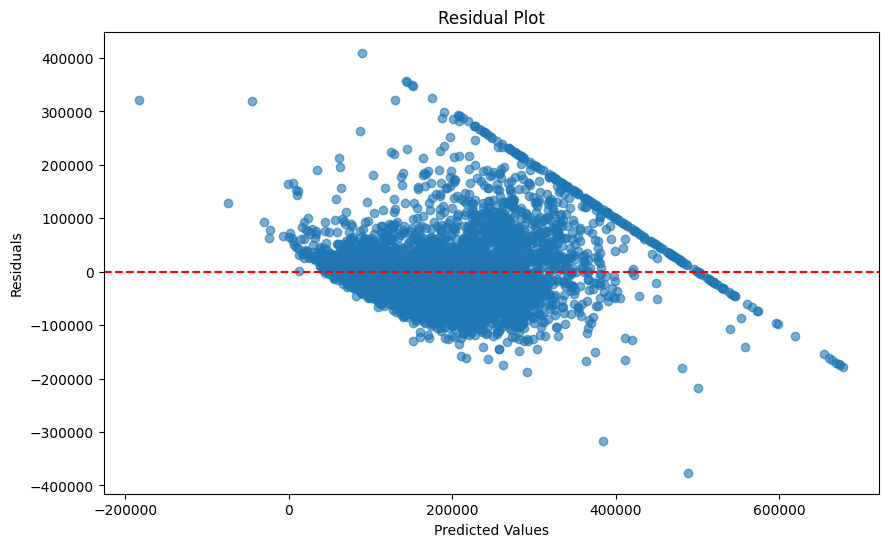

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

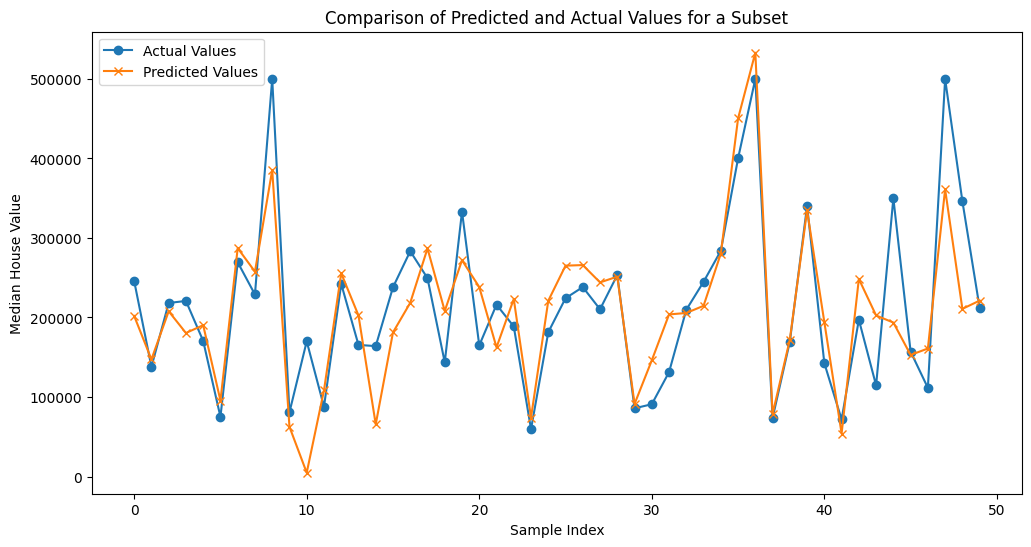

In [ ]:
# Line Plot for a subset of data
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label="Actual Values", marker='o')
plt.plot(y_pred[:50], label="Predicted Values", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Median House Value")
plt.title("Comparison of Predicted and Actual Values for a Subset")
plt.legend()
plt.show()